Análise de Dados SPFC 

In [61]:
import pandas as pd 
# campeonato_brasileiro = pd.read_csv("../Data/Brasileirao_Matches.csv")
# copa_do_brasil = pd.read_csv("../Data/Brazilian_Cup_Matches.csv")
libertadores = pd.read_csv("../Data/Libertadores_Matches.csv")

In [62]:
# criar um dataset com todos os jogos do são paulo na libertadores
sao_paulo = libertadores[(libertadores["home_team"] == "São Paulo") | (libertadores["away_team"] == "São Paulo")]
sao_paulo

,datetime,home_team,away_team,home_goal,away_goal,season,stage
24,2013-02-13 22:00:00,Atlético-MG,São Paulo,2,1,2013.0,group stage
27,2013-02-28 21:30:00,São Paulo,The Strongest,2,1,2013.0,group stage
28,2013-03-07 19:15:00,São Paulo,Arsenal Sarandí,1,1,2013.0,group stage
31,2013-03-14 21:30:00,Arsenal Sarandí,São Paulo,2,1,2013.0,group stage
33,2013-04-04 21:30:00,The Strongest,São Paulo,2,1,2013.0,group stage
35,2013-04-17 22:00:00,São Paulo,Atlético-MG,2,0,2013.0,group stage
110,2013-05-02 20:15:00,São Paulo,Atlético-MG,1,2,2013.0,round of 16
111,2013-05-08 22:00:00,Atlético-MG,São Paulo,4,1,2013.0,round of 16
264,2015-02-18 22:00:00,Corinthians,São Paulo,2,0,2015.0,group stage
266,2015-02-25 22:00:00,São Paulo,Danubio,4,0,2015.0,group stage


Criação da coluna results

In [63]:
# criar uma coluna results
# percorrer cada linha dessa tabela
    # se home_team == "São Paulo"
        # se home_goal > away_goal: results = win
        # se home_goal < away_goal: results = lose
        # se home_goal == away_goal: results = draw
    # se away_team == "São Paulo":
        # se home_goal < away_goal: results = win
        # se home_goal > away_goal: results = lose
        # se home_goal == away_goal: results = draw
sao_paulo["results"] = None

for index, row in sao_paulo.iterrows():
    if row["home_team"] == "São Paulo":
        if row["home_goal"] > row["away_goal"]:
            sao_paulo.loc[index, "results"] = "win" # para preencher uma linha específica
        elif row["home_goal"] < row["away_goal"]:
            sao_paulo.loc[index, "results"] = "lose"
        else: 
            sao_paulo.loc[index, "results"] = "draw" 
    else:
        if row["home_goal"] < row["away_goal"]:
            sao_paulo.loc[index, "results"] = "win"
        elif row["home_goal"] > row["away_goal"]:
            sao_paulo.loc[index, "results"] = "lose"
        else: 
            sao_paulo.loc[index, "results"] = "draw"

sao_paulo

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16848\1652799522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sao_paulo["results"] = None


,datetime,home_team,away_team,home_goal,away_goal,season,stage,results
24,2013-02-13 22:00:00,Atlético-MG,São Paulo,2,1,2013.0,group stage,lose
27,2013-02-28 21:30:00,São Paulo,The Strongest,2,1,2013.0,group stage,win
28,2013-03-07 19:15:00,São Paulo,Arsenal Sarandí,1,1,2013.0,group stage,draw
31,2013-03-14 21:30:00,Arsenal Sarandí,São Paulo,2,1,2013.0,group stage,lose
33,2013-04-04 21:30:00,The Strongest,São Paulo,2,1,2013.0,group stage,lose
35,2013-04-17 22:00:00,São Paulo,Atlético-MG,2,0,2013.0,group stage,win
110,2013-05-02 20:15:00,São Paulo,Atlético-MG,1,2,2013.0,round of 16,lose
111,2013-05-08 22:00:00,Atlético-MG,São Paulo,4,1,2013.0,round of 16,lose
264,2015-02-18 22:00:00,Corinthians,São Paulo,2,0,2015.0,group stage,lose
266,2015-02-25 22:00:00,São Paulo,Danubio,4,0,2015.0,group stage,win


Gráficos com resultados na libertadores

<Axes: xlabel='results'>

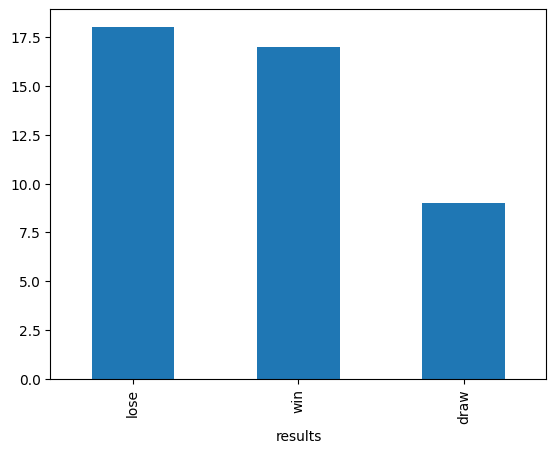

In [64]:
# montar uma tabela com vítorias, derrotas e empates do spfc
sao_paulo.results.value_counts().plot.bar()

Gráfico com resultados na fase de grupos

<Axes: xlabel='results'>

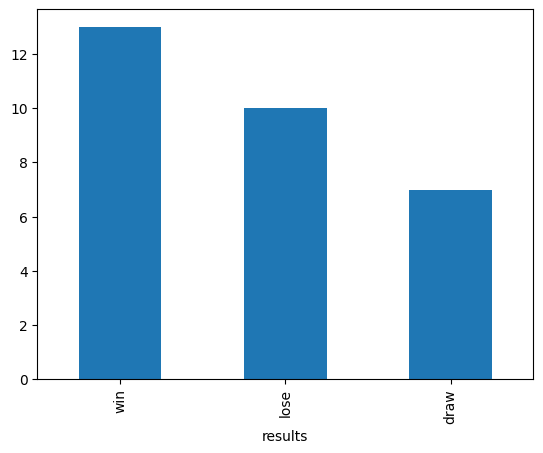

In [65]:
# gráfico de resultados na fase de grupos
sao_paulo_group_stage = sao_paulo[sao_paulo["stage"] == "group stage"]
sao_paulo_group_stage.results.value_counts().plot.bar()

Gráfico com resultados na fase de mata-mata

<Axes: xlabel='results'>

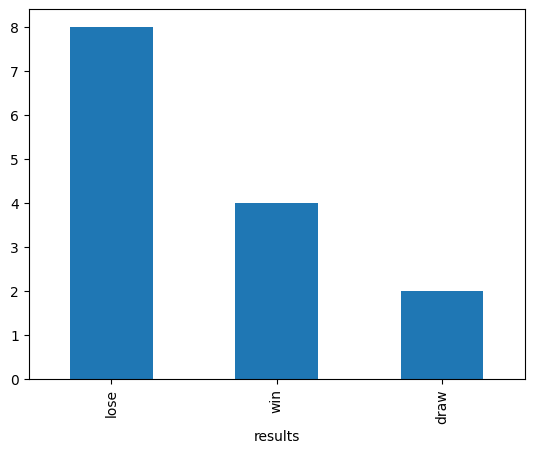

In [66]:
# gráfico de resultados na fase de mata-mata
sao_paulo_mata_mata = sao_paulo[sao_paulo["stage"] != "group stage"]
sao_paulo_mata_mata.results.value_counts().plot.bar()

Gráfico com resultados jogando em casa

<Axes: xlabel='results'>

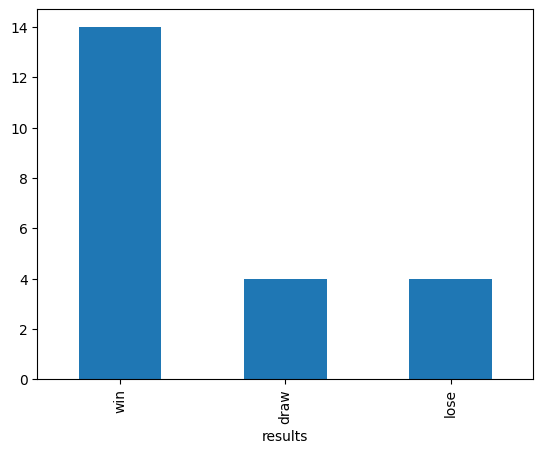

In [67]:
# resultados do spfc jogando em casa
spfc_home = sao_paulo[sao_paulo["home_team"] == "São Paulo"]
spfc_home.results.value_counts().plot.bar()

Gráfico com resultados jogando fora de casa

<Axes: xlabel='results'>

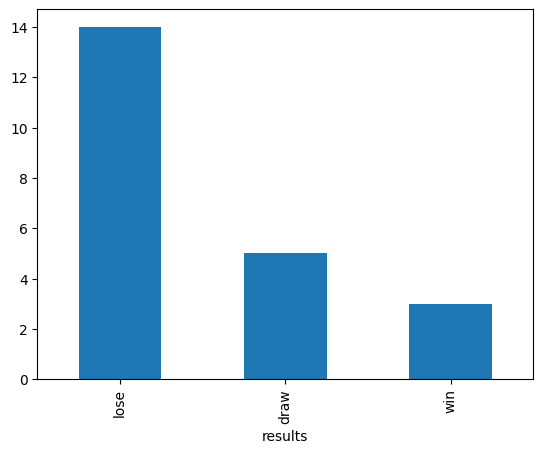

In [68]:
# resultados do são paulo jogando fora de casa
spfc_away = sao_paulo[sao_paulo["away_team"] == "São Paulo"]
spfc_away.results.value_counts().plot.bar()

Tabela com resultados jogando em casa na fase de grupos

<Axes: xlabel='results'>

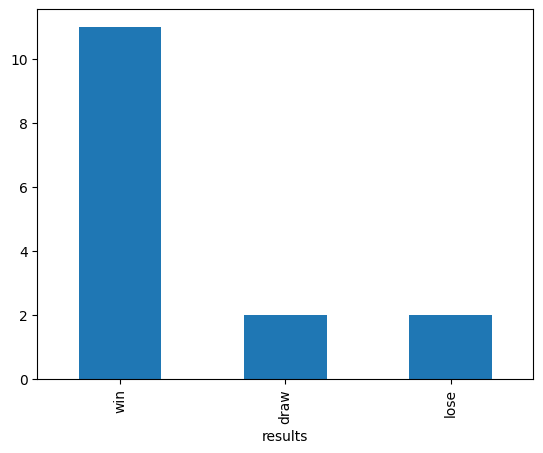

In [69]:
# resultados jogando em casa na fase de grupos
filtro = (sao_paulo["home_team"] == "São Paulo") & (sao_paulo["stage"] == "group stage")
sao_paulo[filtro].results.value_counts().plot.bar()

Resultados jogando em casa na fase de mata-mata

<Axes: xlabel='results'>

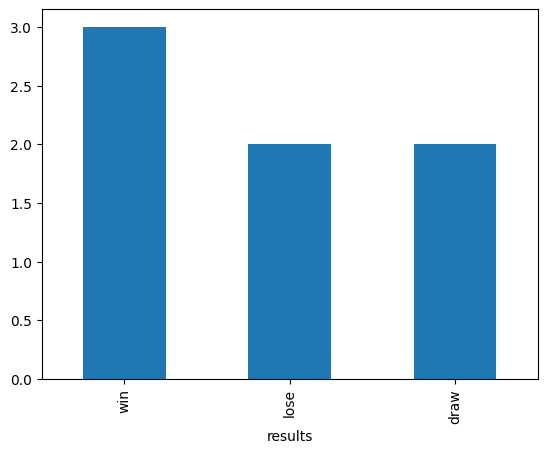

In [72]:
filtro = (sao_paulo["home_team"] == "São Paulo") & (sao_paulo["stage"] != "group stage")
sao_paulo[filtro].results.value_counts().plot.bar()